<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: Clayton Schneider

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [3]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [4]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [5]:
def scatter_line_summary(x, y, title=""):
    plt.cla()
    
    # plot scatter of data
    plt.scatter(x, y, label="Data")
    
    # regression model
    X = sm.add_constant(x) # add constant
    model = sm.OLS(y, X) # create OLS model
    results = model.fit() # fit model
#     fig = sm.graphics.plot_fit(results, 0, ax=ax) # plot line of best fit
    
    bs = results.params

    plt.plot(x, bs[1]*x + bs[0], 'r', label="OLS")
    
    # Print model summary 
    print(results.summary())
    
    plt.xlabel("Independent Variable")
    plt.ylabel("Dependent Variable")
    plt.legend()
    
    plt.show()
    
    return model, results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 26 Apr 2021   Prob (F-statistic):            0.00217
Time:                        23:25:45   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/clayton/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for

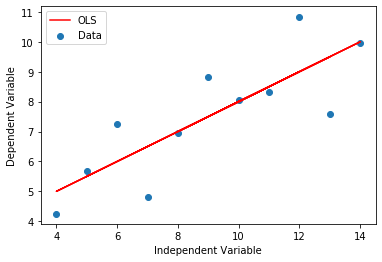

In [6]:
x = df[df['dataset']=='I']['x']
y = df[df['dataset']=='I']['y']

model, results = scatter_line_summary(x, y, title="Dataset I")


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

Text(0, 0.5, 'Residuals of OLS Model')

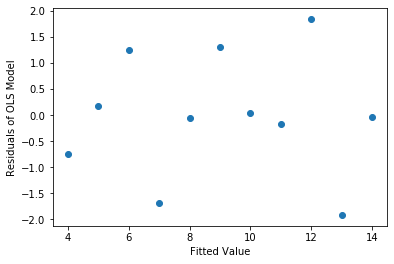

In [7]:
plt.scatter(x, results.resid)

plt.xlabel("Fitted Value")
plt.ylabel("Residuals of OLS Model")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

1) Linear relationship: There likely exists a linear relationship between the variables, as evidenced by the scatter plot

2) Independence: There is no visible relationship among the residuals, and so this criteria too is met

3) Homoscedasticity: It again appears to be met for this dataset. If it were not, we would likely see a more pronounced trend (cone?) of some sort in the residuals' plot.

4) Normality: We've not demonstrated this entirely (nor 3?) for the dataset through the plots above... (I accidentally did a Q-Q plot because I misread part B at first, and I'm comfortable saying that normality is met. 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

N/A


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

All of the criteria were met. No datapoint in particular seemed to be an outlier, and with such a small n, I really don't want to pop anything off the data. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 26 Apr 2021   Prob (F-statistic):            0.00218
Time:                        23:26:10   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/clayton/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for

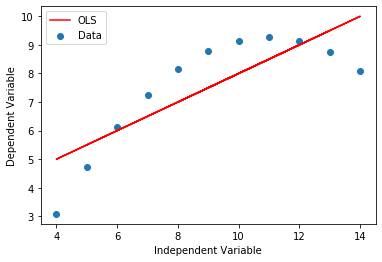

In [9]:
x = df[df['dataset']=='II']['x']
y = df[df['dataset']=='II']['y']

model, results = scatter_line_summary(x, y, title="Dataset II")


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

Text(0, 0.5, 'Residuals of OLS Model')

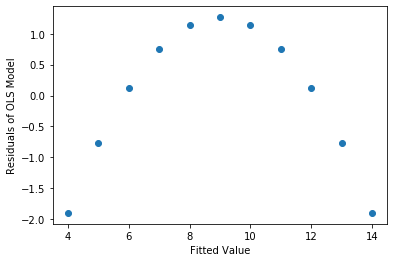

In [10]:
plt.scatter(x, results.resid)

plt.xlabel("Fitted Value")
plt.ylabel("Residuals of OLS Model")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

HAHA no!

1) Linearity: Nope - that's just not linear. It just isn't. 

2) Independence: No - there is a pattern among the 

3) Homoscedasticity: No - this doesn't _seem_ to be met either... But I'm not certain about this one. I believe that the assumption is violated because the variance is accounted for differently through different parts of the original sequence. 

4) Normality: Doesn't seem to be violated. 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?